In [1]:
import pandas as pd
import numpy as np

In [2]:
bee_df = pd.read_csv('data/NASS_Bee-Colony_2015-2021.csv')
bee_df.head()

,State,Starting Colonies,Maximum Colonies,Lost Colonies,Percent Loss,Added Colonies,Renovated Colonies,Percent Renovated,Year
0,Alabama,7000,7000,1800,26,2800,250,4,2015-Q1
1,Arizona,35000,35000,4600,13,3400,2100,6,2015-Q1
2,Arkansas,13000,14000,1500,11,1200,90,1,2015-Q1
3,California,1440000,1690000,255000,15,250000,124000,7,2015-Q1
4,Colorado,3500,12500,1500,12,200,140,1,2015-Q1


In [3]:
bee_df.dtypes

State                 object
Starting Colonies     object
Maximum Colonies      object
Lost Colonies         object
Percent Loss          object
Added Colonies        object
Renovated Colonies    object
Percent Renovated     object
Year                  object
dtype: object

In [4]:
bee_df.describe()

,State,Starting Colonies,Maximum Colonies,Lost Colonies,Percent Loss,Added Colonies,Renovated Colonies,Percent Renovated,Year
count,1222,1222,1222,1222,1222,1222,1222,1222,1222
unique,47,290,281,262,46,260,255,54,26
top,Alabama,(NA),(NA),(NA),8,(NA),0,1,2015-Q1
freq,26,47,47,47,93,47,87,144,47


In [ ]:
print('Total', len(bee_df))

na_counts = bee_df.isna().sum()
print(na_counts.sort_values())

In [ ]:
bee_df['date'] = pd.PeriodIndex(bee_df['Year'], freq='Q').to_timestamp()

In [ ]:
bee_df

In [ ]:
bee_df['Starting Colonies'].describe()

In [ ]:
bee_df['Added Colonies'].describe()

In [ ]:
bee_df['Renovated Colonies'].describe()

In [ ]:
bee_df['Maximum Colonies'].describe()

In [ ]:
bee_df['Year'].value_counts()

In [ ]:
california_bees_df = bee_df[bee_df['State'] == 'California']
spring_cali_bees_df = california_bees_df[california_bees_df['date'].dt.month == 4]

In [ ]:
RELATIONSHIPS = [
    ('date', 'Starting Colonies'),
    ('date', 'Lost Colonies'),
    ('date', 'Percent Loss'),
    ('date', 'Renovated Colonies'),
    ('date', 'Maximum Colonies')
]

SELECT = (0, 4)

relational_dfs = {}
for i in range(SELECT[0], SELECT[1]+1):
    colA, colB = RELATIONSHIPS[i]
    new_df = bee_df[bee_df['State'] == 'California'][[colA, colB]]
    new_df = new_df[new_df['date'].dt.month == 7]
    new_df[colB] = pd.to_numeric(new_df[colB], errors='coerce')
    relational_dfs[f'{colA}_vs_{colB}'] = new_df

In [ ]:
relational_dfs

In [ ]:
relational_dfs['date_vs_Starting Colonies'].plot.line(x='date', 
                                y='Starting Colonies',
                               figsize=(10, 13))

In [ ]:
pd.to_numeric(bee_df['Starting Colonies'], errors='coerce')

In [ ]:
bee_df.dtypes

In [6]:
scatter_data = bee_df[['State', 'Starting Colonies', 'Maximum Colonies', 'Lost Colonies', 'Renovated Colonies']]

In [7]:
scatter_data.head()

,State,Starting Colonies,Maximum Colonies,Lost Colonies,Renovated Colonies
0,Alabama,7000,7000,1800,250
1,Arizona,35000,35000,4600,2100
2,Arkansas,13000,14000,1500,90
3,California,1440000,1690000,255000,124000
4,Colorado,3500,12500,1500,140


In [8]:
EMPTY_MARKER = '(X)'
NULL_MARKER = '(NA)'
UNKNOWN_MARKER = '(Z)'

filtered_scatter = scatter_data.loc[~scatter_data.isin([EMPTY_MARKER, NULL_MARKER, UNKNOWN_MARKER]).any(1)]

In [9]:
filtered_scatter

,State,Starting Colonies,Maximum Colonies,Lost Colonies,Renovated Colonies
0,Alabama,7000,7000,1800,250
1,Arizona,35000,35000,4600,2100
2,Arkansas,13000,14000,1500,90
3,California,1440000,1690000,255000,124000
4,Colorado,3500,12500,1500,140
...,...,...,...,...,...
1216,Washington,66000,122000,2900,2600
1217,West Virginia,8000,9000,170,390
1218,Wisconsin,42000,57000,2200,7500
1219,Wyoming,13500,30000,3400,4900


In [48]:
trimmed_scatter = filtered_scatter[['Starting Colonies', 'Maximum Colonies', 'Renovated Colonies']].astype(int)
trimmed_scatter.head(10)

,Starting Colonies,Maximum Colonies,Renovated Colonies
0,7000,7000,250
1,35000,35000,2100
2,13000,14000,90
3,1440000,1690000,124000
4,3500,12500,140
5,3900,3900,0
6,305000,315000,25000
7,104000,105000,9500
8,10500,10500,760
9,81000,88000,8000


In [49]:
trimmed_scatter.dtypes

Starting Colonies     int64
Maximum Colonies      int64
Renovated Colonies    int64
dtype: object

array([[<AxesSubplot:xlabel='Starting Colonies', ylabel='Starting Colonies'>,
        <AxesSubplot:xlabel='Maximum Colonies', ylabel='Starting Colonies'>,
        <AxesSubplot:xlabel='Renovated Colonies', ylabel='Starting Colonies'>],
       [<AxesSubplot:xlabel='Starting Colonies', ylabel='Maximum Colonies'>,
        <AxesSubplot:xlabel='Maximum Colonies', ylabel='Maximum Colonies'>,
        <AxesSubplot:xlabel='Renovated Colonies', ylabel='Maximum Colonies'>],
       [<AxesSubplot:xlabel='Starting Colonies', ylabel='Renovated Colonies'>,
        <AxesSubplot:xlabel='Maximum Colonies', ylabel='Renovated Colonies'>,
        <AxesSubplot:xlabel='Renovated Colonies', ylabel='Renovated Colonies'>]],
      dtype=object)

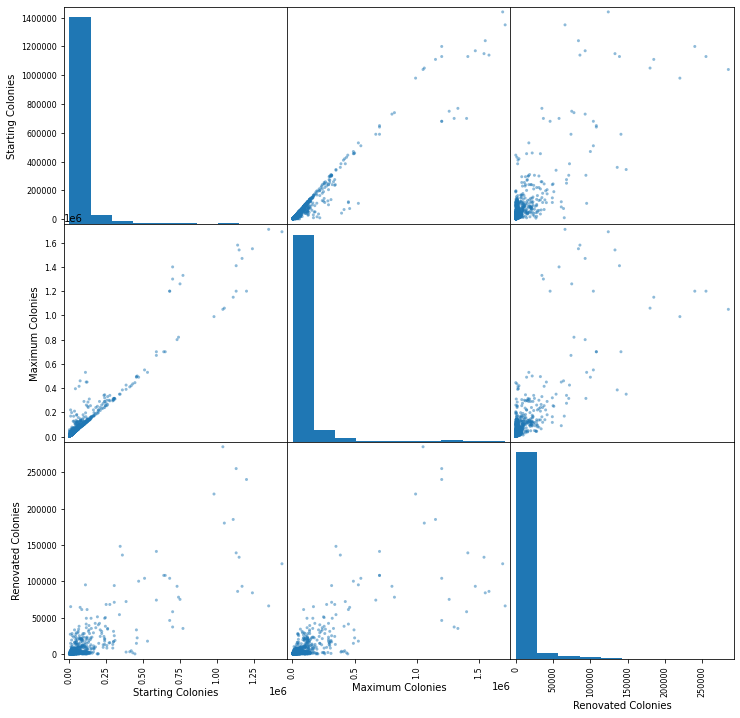

In [53]:
pd.plotting.scatter_matrix(trimmed_scatter, figsize=(12, 12))

Starting Colonies     object
Maximum Colonies      object
Renovated Colonies    object
dtype: object